# CHAPTER 5.3

### Denoising images with autoencoders

 This notebook is really similar with my notebook in pyimagesearch file.. Because of that reason, i won't add details about codes. The difference is dataset and model shape.. 
 
 We add noise to train dataset and try to reconstruct noisy test dataset as its original test dataset...

In [1]:
import cv2
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import *

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

train_noise = np.random.normal(loc=0.5, scale=0.5,
                               size=X_train.shape)
test_noise = np.random.normal(loc=0.5, scale=0.5,
                              size=X_test.shape)

X_train_noisy = np.clip(X_train + train_noise, 0, 1)
X_test_noisy = np.clip(X_test + test_noise, 0, 1)

In [3]:
def build_autoencoder(input_shape=(28, 28, 1),
                      encoding_size=128,
                      alpha=0.2):
    inputs = Input(shape=input_shape)
    encoder = Conv2D(filters=32,
                     kernel_size=(3, 3),
                     strides=2,
                     padding='same')(inputs)
    encoder = LeakyReLU(alpha=alpha)(encoder)
    encoder = BatchNormalization()(encoder)
    encoder = Conv2D(filters=64,
                     kernel_size=(3, 3),
                     strides=2,
                     padding='same')(encoder)
    encoder = LeakyReLU(alpha=alpha)(encoder)
    encoder = BatchNormalization()(encoder)

    encoder_output_shape = encoder.shape
    encoder = Flatten()(encoder)
    encoder_output = Dense(units=encoding_size)(encoder)

    encoder_model = Model(inputs, encoder_output)

    # Build decoder
    decoder_input = Input(shape=(encoding_size,))
    decoder_dense_units = np.prod(encoder_output_shape[1:])
    decoder = Dense(units=decoder_dense_units)(decoder_input)
    decoder = Reshape(tuple(encoder_output_shape[1:]))(decoder)

    decoder = Conv2DTranspose(filters=64,
                              kernel_size=(3, 3),
                              strides=2,
                              padding='same')(decoder)
    decoder = LeakyReLU(alpha=alpha)(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Conv2DTranspose(filters=32,
                              kernel_size=(3, 3),
                              strides=2,
                              padding='same')(decoder)
    decoder = LeakyReLU(alpha=alpha)(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Conv2DTranspose(filters=1,
                              kernel_size=(3, 3),
                              padding='same')(decoder)
    outputs = Activation('sigmoid')(decoder)

    decoder_model = Model(decoder_input, outputs)

    encoder_model_output = encoder_model(inputs)
    decoder_model_output = decoder_model(encoder_model_output)
    autoencoder_model = Model(inputs, decoder_model_output)

    return encoder_model, decoder_model, autoencoder_model

In [4]:
_, _, autoencoder = build_autoencoder(encoding_size=128)
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 128)               420736    
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         460609    
                                                                 
Total params: 881,345
Trainable params: 880,961
Non-trainable params: 384
_________________________________________________________________


In [6]:
EPOCHS = 300
BATCH_SIZE = 1024
autoencoder.fit(X_train_noisy, X_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Epoch 1/300
59/59 [==============================] - 16s 66ms/step - loss: 0.0544 - val_loss: 0.1153
Epoch 2/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0252 - val_loss: 0.1157
Epoch 3/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0200 - val_loss: 0.1163
Epoch 4/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0180 - val_loss: 0.1120
Epoch 5/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0170 - val_loss: 0.1014
Epoch 6/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0163 - val_loss: 0.0912
Epoch 7/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0158 - val_loss: 0.0724
Epoch 8/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0153 - val_loss: 0.0546
Epoch 9/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0150 - val_loss: 0.0401
Epoch 10/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0146 - val_loss: 0.025

59/59 [==============================] - 3s 57ms/step - loss: 0.0102 - val_loss: 0.0142
Epoch 83/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0102 - val_loss: 0.0148
Epoch 84/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0102 - val_loss: 0.0153
Epoch 85/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0101 - val_loss: 0.0147
Epoch 86/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0101 - val_loss: 0.0143
Epoch 87/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0100 - val_loss: 0.0144
Epoch 88/300
59/59 [==============================] - 4s 60ms/step - loss: 0.0100 - val_loss: 0.0144
Epoch 89/300
59/59 [==============================] - 4s 61ms/step - loss: 0.0100 - val_loss: 0.0150
Epoch 90/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0100 - val_loss: 0.0149
Epoch 91/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0099 - val_loss: 0.0150
Epo

59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0153
Epoch 163/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0155
Epoch 164/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0161
Epoch 165/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0090 - val_loss: 0.0153
Epoch 166/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0163
Epoch 167/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0090 - val_loss: 0.0159
Epoch 168/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0153
Epoch 169/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0091 - val_loss: 0.0154
Epoch 170/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0090 - val_loss: 0.0155
Epoch 171/300
59/59 [==============================] - 3s 56ms/step - loss: 0.0091 - val_loss: 0

59/59 [==============================] - 3s 56ms/step - loss: 0.0087 - val_loss: 0.0161
Epoch 243/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0087 - val_loss: 0.0163
Epoch 244/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0087 - val_loss: 0.0159
Epoch 245/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0087 - val_loss: 0.0168
Epoch 246/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0087 - val_loss: 0.0161
Epoch 247/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0086 - val_loss: 0.0161
Epoch 248/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0086 - val_loss: 0.0172
Epoch 249/300
59/59 [==============================] - 3s 58ms/step - loss: 0.0087 - val_loss: 0.0165
Epoch 250/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0086 - val_loss: 0.0165
Epoch 251/300
59/59 [==============================] - 3s 57ms/step - loss: 0.0086 - val_loss: 0

In [7]:
predictions = autoencoder.predict(X_test)

original_shape = (X_test_noisy.shape[0], 28, 28)
predictions = predictions.reshape(original_shape)
X_test_noisy = X_test_noisy.reshape(original_shape)

predictions = (predictions * 255.0).astype('uint8')
X_test_noisy = (X_test_noisy * 255.0).astype('uint8')

In [10]:
def plot_original_vs_generated(original, generated):
    num_images = 15
    sample = np.random.randint(0, len(original), num_images)

    def stack(data):
        images = data[sample]
        return np.vstack([np.hstack(images[:5]),
                          np.hstack(images[5:10]),
                          np.hstack(images[10:15])])

    def add_text(image, text, position):
        pt1 = position
        pt2 = (pt1[0] + 10 + (len(text) * 22),
               pt1[1] - 45)
        cv2.rectangle(image,
                      pt1,
                      pt2,
                      (255, 255, 255),
                      -1)
        cv2.putText(image, text,
                    position,
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1.3,
                    color=(0, 0, 0),
                    thickness=4)

    original = stack(original)
    generated = stack(generated)

    mosaic = np.vstack([original,
                        generated])
    mosaic = cv2.resize(mosaic, (800, 800),
                        interpolation=cv2.INTER_AREA)
    mosaic = cv2.cvtColor(mosaic, cv2.COLOR_GRAY2BGR)

    add_text(mosaic, 'Original', (50, 100))
    add_text(mosaic, 'Generated', (50, 520))

    cv2.imshow('MosaicOfDenoising', mosaic)
    cv2.waitKey(0)


In [11]:
plot_original_vs_generated(X_test_noisy, predictions)

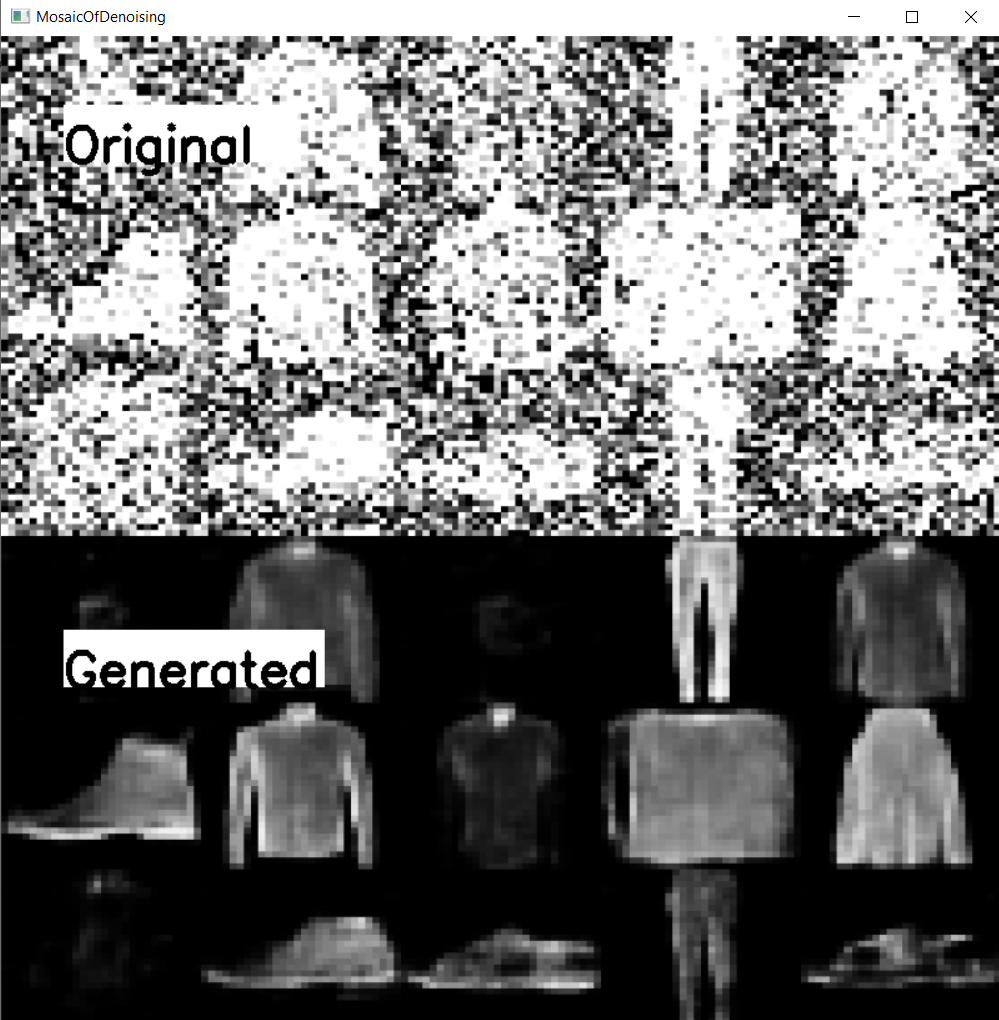